In [70]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [71]:
# Loading in data
train_data = datasets.MNIST(root='./mnist_data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST(root='./mnist_data', train=False, download=False, transform=transforms.ToTensor())

Number of images in Training data:  60000
Shape of a random image from train data is:  torch.Size([1, 28, 28]) 2


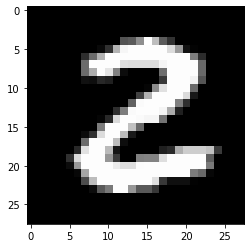

In [72]:
image, label = train_data[25]
print('Number of images in Training data: ', len(train_data))
print('Shape of a random image from train data is: ', image.shape, label)

# plotting the image
plt.imshow(image.reshape(28,28), cmap = 'gray')

In [73]:
batch_size = 100

# DataLoaders
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

Neural Netwrok Architecture

--- Input Layers --- 784 neurons - input of 28 * 28


--- Hidden Layer --- 256 neurons


--- Output Layer --- 10 neurons - 0 to 9 digits to classify from

We will use relu activation function and we will use softmax rto give us the probabilities at the output layer

In [74]:
# Define Model
class MNIST_classifier(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(MNIST_classifier, self).__init__()

    self.fc1 = nn.Linear(input_size, hidden_size)
    self.fc2 = nn.Linear(hidden_size, output_size)
    self.act = nn.ReLU()
    
  def forward(self, input):
    out1 = self.fc1(input)
    out1 = self.act(out1)
    final_out = self.fc2(out1)

    return final_out


In [75]:
# Defining hyperparameters
input_size = 784
hidden_size = 256
output_size = 10
epochs = 10
learning_rate = 0.001

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [76]:
model = MNIST_classifier(input_size, hidden_size, output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [77]:
# Train the network
print('\n Training model on training dataset \n')
for epoch in range(epochs):
  for batch_index, (images, labels) in enumerate(train_loader):
    images = images.to(device=device)
    labels = labels.to(device=device) 

    # Getting data in the correct shape
    images = images.view(-1, 784)

    # Forward Propogation
    predictions = model(images)
    loss = criterion(predictions, labels)

    # Backward Propogation
    optimizer.zero_grad()
    loss.backward()

    # Gradient Descent
    optimizer.step()
  
    if batch_index % 100 == 0:
      print(f'Epoch {epoch+1}, batch number {batch_index+100}, loss is {loss}')
    



 Training model on training dataset 

Epoch 1, batch number 100, loss is 2.3062267303466797
Epoch 1, batch number 200, loss is 0.43779197335243225
Epoch 1, batch number 300, loss is 0.21239660680294037
Epoch 1, batch number 400, loss is 0.37343403697013855
Epoch 1, batch number 500, loss is 0.2786595821380615
Epoch 1, batch number 600, loss is 0.22813086211681366
Epoch 2, batch number 100, loss is 0.24473904073238373
Epoch 2, batch number 200, loss is 0.11922585219144821
Epoch 2, batch number 300, loss is 0.11561247706413269
Epoch 2, batch number 400, loss is 0.1427127718925476
Epoch 2, batch number 500, loss is 0.1802217662334442
Epoch 2, batch number 600, loss is 0.09787431359291077
Epoch 3, batch number 100, loss is 0.08286131173372269
Epoch 3, batch number 200, loss is 0.11686652153730392
Epoch 3, batch number 300, loss is 0.12697206437587738
Epoch 3, batch number 400, loss is 0.06710396707057953
Epoch 3, batch number 500, loss is 0.05593651905655861
Epoch 3, batch number 600, los

In [78]:
# Testing Time : Checking accuracy on Test Data
def check_accuracy(loader, model):
  num_correct = 0
  num_samples = 0

  model.eval()

  with torch.no_grad():
    for x, y in loader:
      x = x.to(device = device)
      y = y.to(device = device)
      x = x.view(-1, 784)

      y_pred = model(x)
      # print(y_pred.shape)
      values, position = torch.max(y_pred, axis=1)
      # print(position, y)
      num_correct += (position == y).sum()
      num_samples += y.shape[0]

      # print(num_correct,'/',num_samples)

    accuracy = float((num_correct/num_samples) * 100)
    print(f'Accuracy on Test Set is {accuracy}')


check_accuracy(test_loader, model)

Accuracy on Test Set is 97.93000030517578
